In [47]:
import numpy as np
import webcolors
import cv2
import matplotlib.pyplot as plt

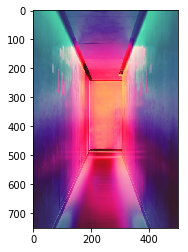

In [48]:
img=cv2.imread('img.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [49]:
print(img.shape)
img=img.reshape(img.shape[0]*img.shape[1],-1)
print(img.shape)

(750, 500, 3)
(375000, 3)


In [50]:
n_clusters=4
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters)
kmeans.fit(img)
colors=kmeans.cluster_centers_
labels=kmeans.labels_

In [67]:
def closest_color(req_color):
    min_color={}
    for key, name in webcolors.css3_hex_to_names.items():
        r,g,b=webcolors.hex_to_rgb(key)
        R=(r-req_color[0])**2
        G=(g-req_color[1])**2
        B=(b-req_color[2])**2
        min_color[R+B+G]=name
    return min_color[min(min_color.keys())]   

In [68]:
def get_name(req_color):
    try:
        closest_name=actual_name=webcolors.rgb_to_name(req_color)
    except ValueError:
        closest_name=closest_color(req_color)
        actual_name=None
    return actual_name, closest_name

In [69]:
labelCount=[0 for i in range(n_clusters)]
for l in labels:
    labelCount[l]+=1
indexC=labelCount.index(max(labelCount))
print
for index,l in enumerate(labelCount):
    print(str(l)+'labels with pixel vale ->')
    print(colors[index],)
    print('% -> '+ str(float(l)/len(labels)*100))
    print()


65090labels with pixel vale ->
[238.53085775 138.78821306 150.3441749 ]
% -> 17.357333333333333

116143labels with pixel vale ->
[ 84.90645705 123.00108421 151.78074931]
% -> 30.971466666666668

111934labels with pixel vale ->
[ 79.52217295  32.18544811 102.12233567]
% -> 29.84906666666667

81833labels with pixel vale ->
[215.61266479  42.25883029 123.70784005]
% -> 21.822133333333333



In [70]:

actual_name,closest_name=get_name(colors[indexC])
print('Actual name ->'+str(actual_name)+' closest name ->'+ closest_name)

Actual name ->None closest name ->slategrey
